<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week3/Exercises/Exercises_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 3
# Exercises - Solutions

### Table of Contents
#### Exercise 1: Advanced Pandas Operations
#### Exercise 2: EDA and Visualization

## Exercise 1: Advanced Pandas Operations


In [1]:
# Import requiered packages
import pandas as pd
import matplotlib.pyplot as plt

### A. Merge
In this simple exercise, we illustrate the concepts of inner, outer, left and right joins.

In [2]:
# Create a first DataFrame
data_1 = {'ID':  ['12345678', '11223344', '87654321', '44332211'],
        'First Name': ['George', 'Abraham', 'Harry S.', 'Richard'],
         'Last Name': ['Washington', 'Lincoln', 'Truman', 'Nixon'],
          'Party': ['Unaffiliated', 'Republican', 'Democratic', 'Republican'],
        }

df_1 = pd.DataFrame(data_1)

df_1

,ID,First Name,Last Name,Party
0,12345678,George,Washington,Unaffiliated
1,11223344,Abraham,Lincoln,Republican
2,87654321,Harry S.,Truman,Democratic
3,44332211,Richard,Nixon,Republican


In [3]:
# Create a second DataFrame
data_2 = {'ID':  ['12345678', '11223344', '88888888', '44332211', '11111111', '22222222', '33333333'],
        'Grade': [4, 2.5, 5.5, 6, 3.5, 4, 4]
        }

df_2 = pd.DataFrame(data_2)

df_2

,ID,Grade
0,12345678,4.0
1,11223344,2.5
2,88888888,5.5
3,44332211,6.0
4,11111111,3.5
5,22222222,4.0
6,33333333,4.0


###### A.1 Merge the two DataFrames using an inner join. How many columns and rows has the resulting DataFrame?

In [4]:
# Inner join
df_merged = df_1.merge(df_2, how='inner', on='ID')

df_merged # 3 rows and 5 columns

,ID,First Name,Last Name,Party,Grade
0,12345678,George,Washington,Unaffiliated,4.0
1,11223344,Abraham,Lincoln,Republican,2.5
2,44332211,Richard,Nixon,Republican,6.0


###### A.2 Merge the two DataFrames using an outer join. How many columns and rows has the resulting DataFrame?

In [5]:
# Outer join
df_merged = df_1.merge(df_2, how='outer', on='ID')

df_merged # 8 rows and 5 columns

,ID,First Name,Last Name,Party,Grade
0,12345678,George,Washington,Unaffiliated,4.0
1,11223344,Abraham,Lincoln,Republican,2.5
2,87654321,Harry S.,Truman,Democratic,NaN
3,44332211,Richard,Nixon,Republican,6.0
4,88888888,NaN,NaN,NaN,5.5
5,11111111,NaN,NaN,NaN,3.5
6,22222222,NaN,NaN,NaN,4.0
7,33333333,NaN,NaN,NaN,4.0


###### A.3 Merge the two DataFrames using a left join, where `df_1` is on the left and `df_2` on the right. How many columns and rows has the resulting DataFrame?

In [6]:
# Left join
df_merged = df_1.merge(df_2, how='left', on='ID')

df_merged # 4 rows and 5 columns

,ID,First Name,Last Name,Party,Grade
0,12345678,George,Washington,Unaffiliated,4.0
1,11223344,Abraham,Lincoln,Republican,2.5
2,87654321,Harry S.,Truman,Democratic,NaN
3,44332211,Richard,Nixon,Republican,6.0


### B. Aggregation
We use the car data available on the github repository.

In [7]:
# Import data
cars = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week3/data/cars.csv", sep=",")

cars.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               53 non-null     int64  
 1   Make               53 non-null     object 
 2   Model              53 non-null     object 
 3   Size               53 non-null     object 
 4   (kW)               53 non-null     int64  
 5   Unnamed: 5         53 non-null     object 
 6   TYPE               53 non-null     object 
 7   CITY (kWh/100 km)  53 non-null     float64
 8   HWY (kWh/100 km)   53 non-null     float64
 9   COMB (kWh/100 km)  53 non-null     float64
 10  CITY (Le/100 km)   53 non-null     float64
 11  HWY (Le/100 km)    53 non-null     float64
 12  COMB (Le/100 km)   53 non-null     float64
 13  (g/km)             53 non-null     int64  
 14  RATING             19 non-null     float64
 15  (km)               53 non-null     int64  
 16  TIME (h)           53 non-nu

###### B.1 Find the average `(kW)` per `Make`. Plot the result using a bar plot.

In [9]:
# Average (kW) per Make
cars.groupby("Make", as_index=True)["(kW)"].mean()

Make
BMW           125.000000
CHEVROLET     104.000000
FORD          107.000000
KIA            81.000000
MITSUBISHI     49.000000
NISSAN         80.000000
SMART          35.000000
TESLA         345.478261
Name: (kW), dtype: float64

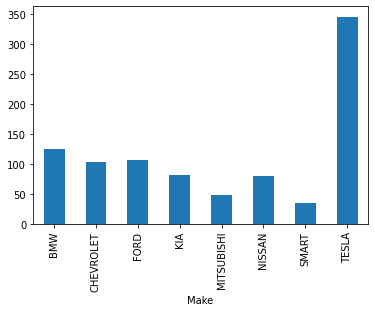

In [10]:
# Plot
cars.groupby("Make", as_index=True)["(kW)"].mean().plot(kind='bar')

###### B.2 Select the two most powerful vehicules per year

In [11]:
# Two most powerful per year. Note: if two cars have the same power, it takes the first one in the DataFrame.
cars.sort_values(["(kW)"], ascending=False).groupby('YEAR').head(2).sort_values(["YEAR"])

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
10,2013,TESLA,MODEL S PERFORMANCE,FULL-SIZE,310,A1,B,23.9,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12
19,2014,TESLA,MODEL S PERFORMANCE,FULL-SIZE,310,A1,B,23.9,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12
18,2014,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12
33,2015,TESLA,MODEL S P85D/P90D,FULL-SIZE,515,A1,B,23.4,21.5,22.5,2.6,2.4,2.5,0,NaN,407,12
28,2015,TESLA,MODEL S (60 kWh battery),FULL-SIZE,283,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,NaN,335,10
52,2016,TESLA,MODEL X P90D,SUV - STANDARD,568,A1,B,23.6,23.3,23.5,2.7,2.6,2.6,0,10.0,402,12
50,2016,TESLA,MODEL S P90D (Refresh),FULL-SIZE,568,A1,B,22.9,21.0,22.1,2.6,2.4,2.5,0,10.0,435,12


## Exercise 2: EDA and Visualization
For this exercise, we use NBA data available on the github repository.

In [12]:
# Import data
nba = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week3/data/nba_stats.csv", sep=",")

nba.head()

,Year,Player,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017,Ivica Zubac,C,19,LAL,609,32,159,30,14,33,30,66,284
1,2017,Gerald Green,SF,31,BOS,538,33,85,33,9,7,25,48,262
2,2017,Danny Green,SG,29,SAS,1807,27,224,124,71,58,76,120,497
3,2017,Jerian Grant,PG,24,CHI,1028,65,111,120,47,8,44,93,370
4,2017,Jerami Grant,SF,22,OKC,1490,86,199,46,33,75,41,144,421


In [13]:
nba.tail()

,Year,Player,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
19640,1978,Eddie Owens,SF,24,BUF,63,3,10,5,1,0,3,9,21
19641,1978,Tom Owens,C,28,POR,1714,206,541,160,33,37,152,263,832
19642,1978,Joe Pace,C,24,WSB,438,57,134,23,12,21,44,86,191
19643,1978,Robert Parish*,C,24,GSW,1969,165,680,95,79,123,201,291,1025
19644,1978,Willie Norwood,SF,30,DET,260,20,54,14,13,3,17,45,88


In [14]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19645 entries, 0 to 19644
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    19645 non-null  int64 
 1   Player  19645 non-null  object
 2   Pos     19645 non-null  object
 3   Age     19645 non-null  int64 
 4   Tm      19645 non-null  object
 5   MP      19645 non-null  int64 
 6   FT      19645 non-null  int64 
 7   TRB     19645 non-null  int64 
 8   AST     19645 non-null  int64 
 9   STL     19645 non-null  int64 
 10  BLK     19645 non-null  int64 
 11  TOV     19645 non-null  int64 
 12  PF      19645 non-null  int64 
 13  PTS     19645 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


###### 1. Find the average age of the players for the year 2017.

In [15]:
nba_2017 = nba.loc[nba["Year"] == 2017]

nba_2017.describe() # Average age of players is 26.406723

,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
count,595.0,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2017.0,26.406723,1090.680672,79.868908,196.363025,101.053782,34.663866,21.505882,60.327731,90.226891,474.732773
std,0.0,4.264720,835.226618,103.832144,191.797731,126.674895,31.751104,27.915177,60.010620,66.454516,470.130454
min,2017.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,23.000000,321.000000,12.000000,45.000000,18.500000,8.000000,3.000000,14.000000,29.000000,103.000000
50%,2017.0,26.000000,1013.000000,45.000000,151.000000,58.000000,27.000000,11.000000,43.000000,84.000000,357.000000
75%,2017.0,29.000000,1757.500000,103.000000,280.500000,132.500000,52.000000,29.000000,88.500000,139.000000,685.000000
max,2017.0,40.000000,3048.000000,746.000000,1116.000000,906.000000,157.000000,214.000000,464.000000,278.000000,2558.000000


###### 2. Plot the total number of `PTS` per year since 2000.

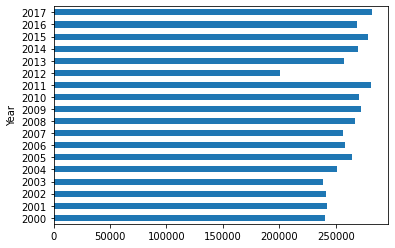

In [16]:
nba.loc[nba["Year"] >= 2000].groupby(["Year"])["PTS"].sum().plot(kind="barh")

###### 3. Plot the number of players per year since 2010. What is the year with the most players?

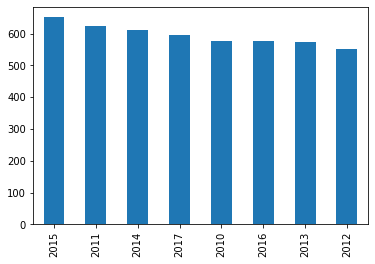

In [17]:
nba.loc[nba["Year"] >= 2010]["Year"].value_counts(sort=True).plot(kind="bar")
# Year with most players between 2010 and 2017 is 2015